In [37]:
import numpy as np
from scipy.stats import norm
import time
start_time = time.time()
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix #Classification report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


In [2]:
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**PART-1(**

Part 1.1 a - Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

In [4]:
path="/content/drive/MyDrive/AIMLCOURSE/UnSupervisedLearning/carname.csv"
carname=pd.read_csv(path)
carname.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


Part 1.1 b - Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

Note-> I have used an online Json to csv converter.

In [5]:
path="/content/drive/MyDrive/AIMLCOURSE/UnSupervisedLearning/carattributes.csv"
carattributes=pd.read_csv(path)
carattributes.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


Part 1.1 c - Merge both the DataFrames together to form a single DataFrame

In [6]:
# Merge the DataFrames
merged_df = pd.concat([carname, carattributes], axis=1, join='inner')

# Display the merged DataFrame
print(merged_df)

                      car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0    chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1            buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2           plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3                amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                  ford torino  17.0    8  302.0  140  3449  10.5  70       1
..                         ...   ...  ...    ...  ...   ...   ...  ..     ...
393            ford mustang gl  27.0    4  140.0   86  2790  15.6  82       1
394                  vw pickup  44.0    4   97.0   52  2130  24.6  82       2
395              dodge rampage  32.0    4  135.0   84  2295  11.6  82       1
396                ford ranger  28.0    4  120.0   79  2625  18.6  82       1
397                 chevy s-10  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 9 columns]


Part 1.1 d - Print 5 point summary of the numerical features and share insights.

In [7]:
summary = merged_df.describe()
print(summary)


              mpg         cyl        disp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   
std      7.815984    1.701004  104.269838   846.841774    2.757689   
min      9.000000    3.000000   68.000000  1613.000000    8.000000   
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   
50%     23.000000    4.000000  148.500000  2803.500000   15.500000   
75%     29.000000    8.000000  262.000000  3608.000000   17.175000   
max     46.600000    8.000000  455.000000  5140.000000   24.800000   

               yr      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


Part 1.2 a - Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [8]:
# Check for missing values
missing_values = merged_df.isnull().sum()

# Calculate percentage of missing values
percentage_missing = (missing_values / len(merged_df)) * 100

# Print feature-wise percentage of missing values
print(percentage_missing)

# Convert categorical data to numerical using Label Encoding
label_encoder = LabelEncoder()
for column in merged_df.columns:
    if merged_df[column].dtype == 'object':
        merged_df[column] = label_encoder.fit_transform(merged_df[column])

# Impute missing values with KNN
imputer = KNNImputer(n_neighbors=5)
imputed_df = imputer.fit_transform(merged_df)

# Convert the NumPy array back to a DataFrame
imputed_df = pd.DataFrame(imputed_df, columns=merged_df.columns)

# Verify that the missing values have been imputed
print(imputed_df)

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64
     car_name   mpg  cyl   disp    hp      wt   acc    yr  origin
0        49.0  18.0  8.0  307.0  15.0  3504.0  12.0  70.0     1.0
1        36.0  15.0  8.0  350.0  33.0  3693.0  11.5  70.0     1.0
2       231.0  18.0  8.0  318.0  27.0  3436.0  11.0  70.0     1.0
3        14.0  16.0  8.0  304.0  27.0  3433.0  12.0  70.0     1.0
4       161.0  17.0  8.0  302.0  22.0  3449.0  10.5  70.0     1.0
..        ...   ...  ...    ...   ...     ...   ...   ...     ...
393     153.0  27.0  4.0  140.0  80.0  2790.0  15.6  82.0     1.0
394     301.0  44.0  4.0   97.0  51.0  2130.0  24.6  82.0     2.0
395     119.0  32.0  4.0  135.0  78.0  2295.0  11.6  82.0     1.0
396     159.0  28.0  4.0  120.0  73.0  2625.0  18.6  82.0     1.0
397      69.0  31.0  4.0  119.0  76.0  2720.0  19.4  82.0     1.0

[398 rows x 9 columns]


Part 1.2 b - Check for duplicate values in the data and impute with the best suitable approach.

Part 1.2 c - Plot a pairplot for all features.

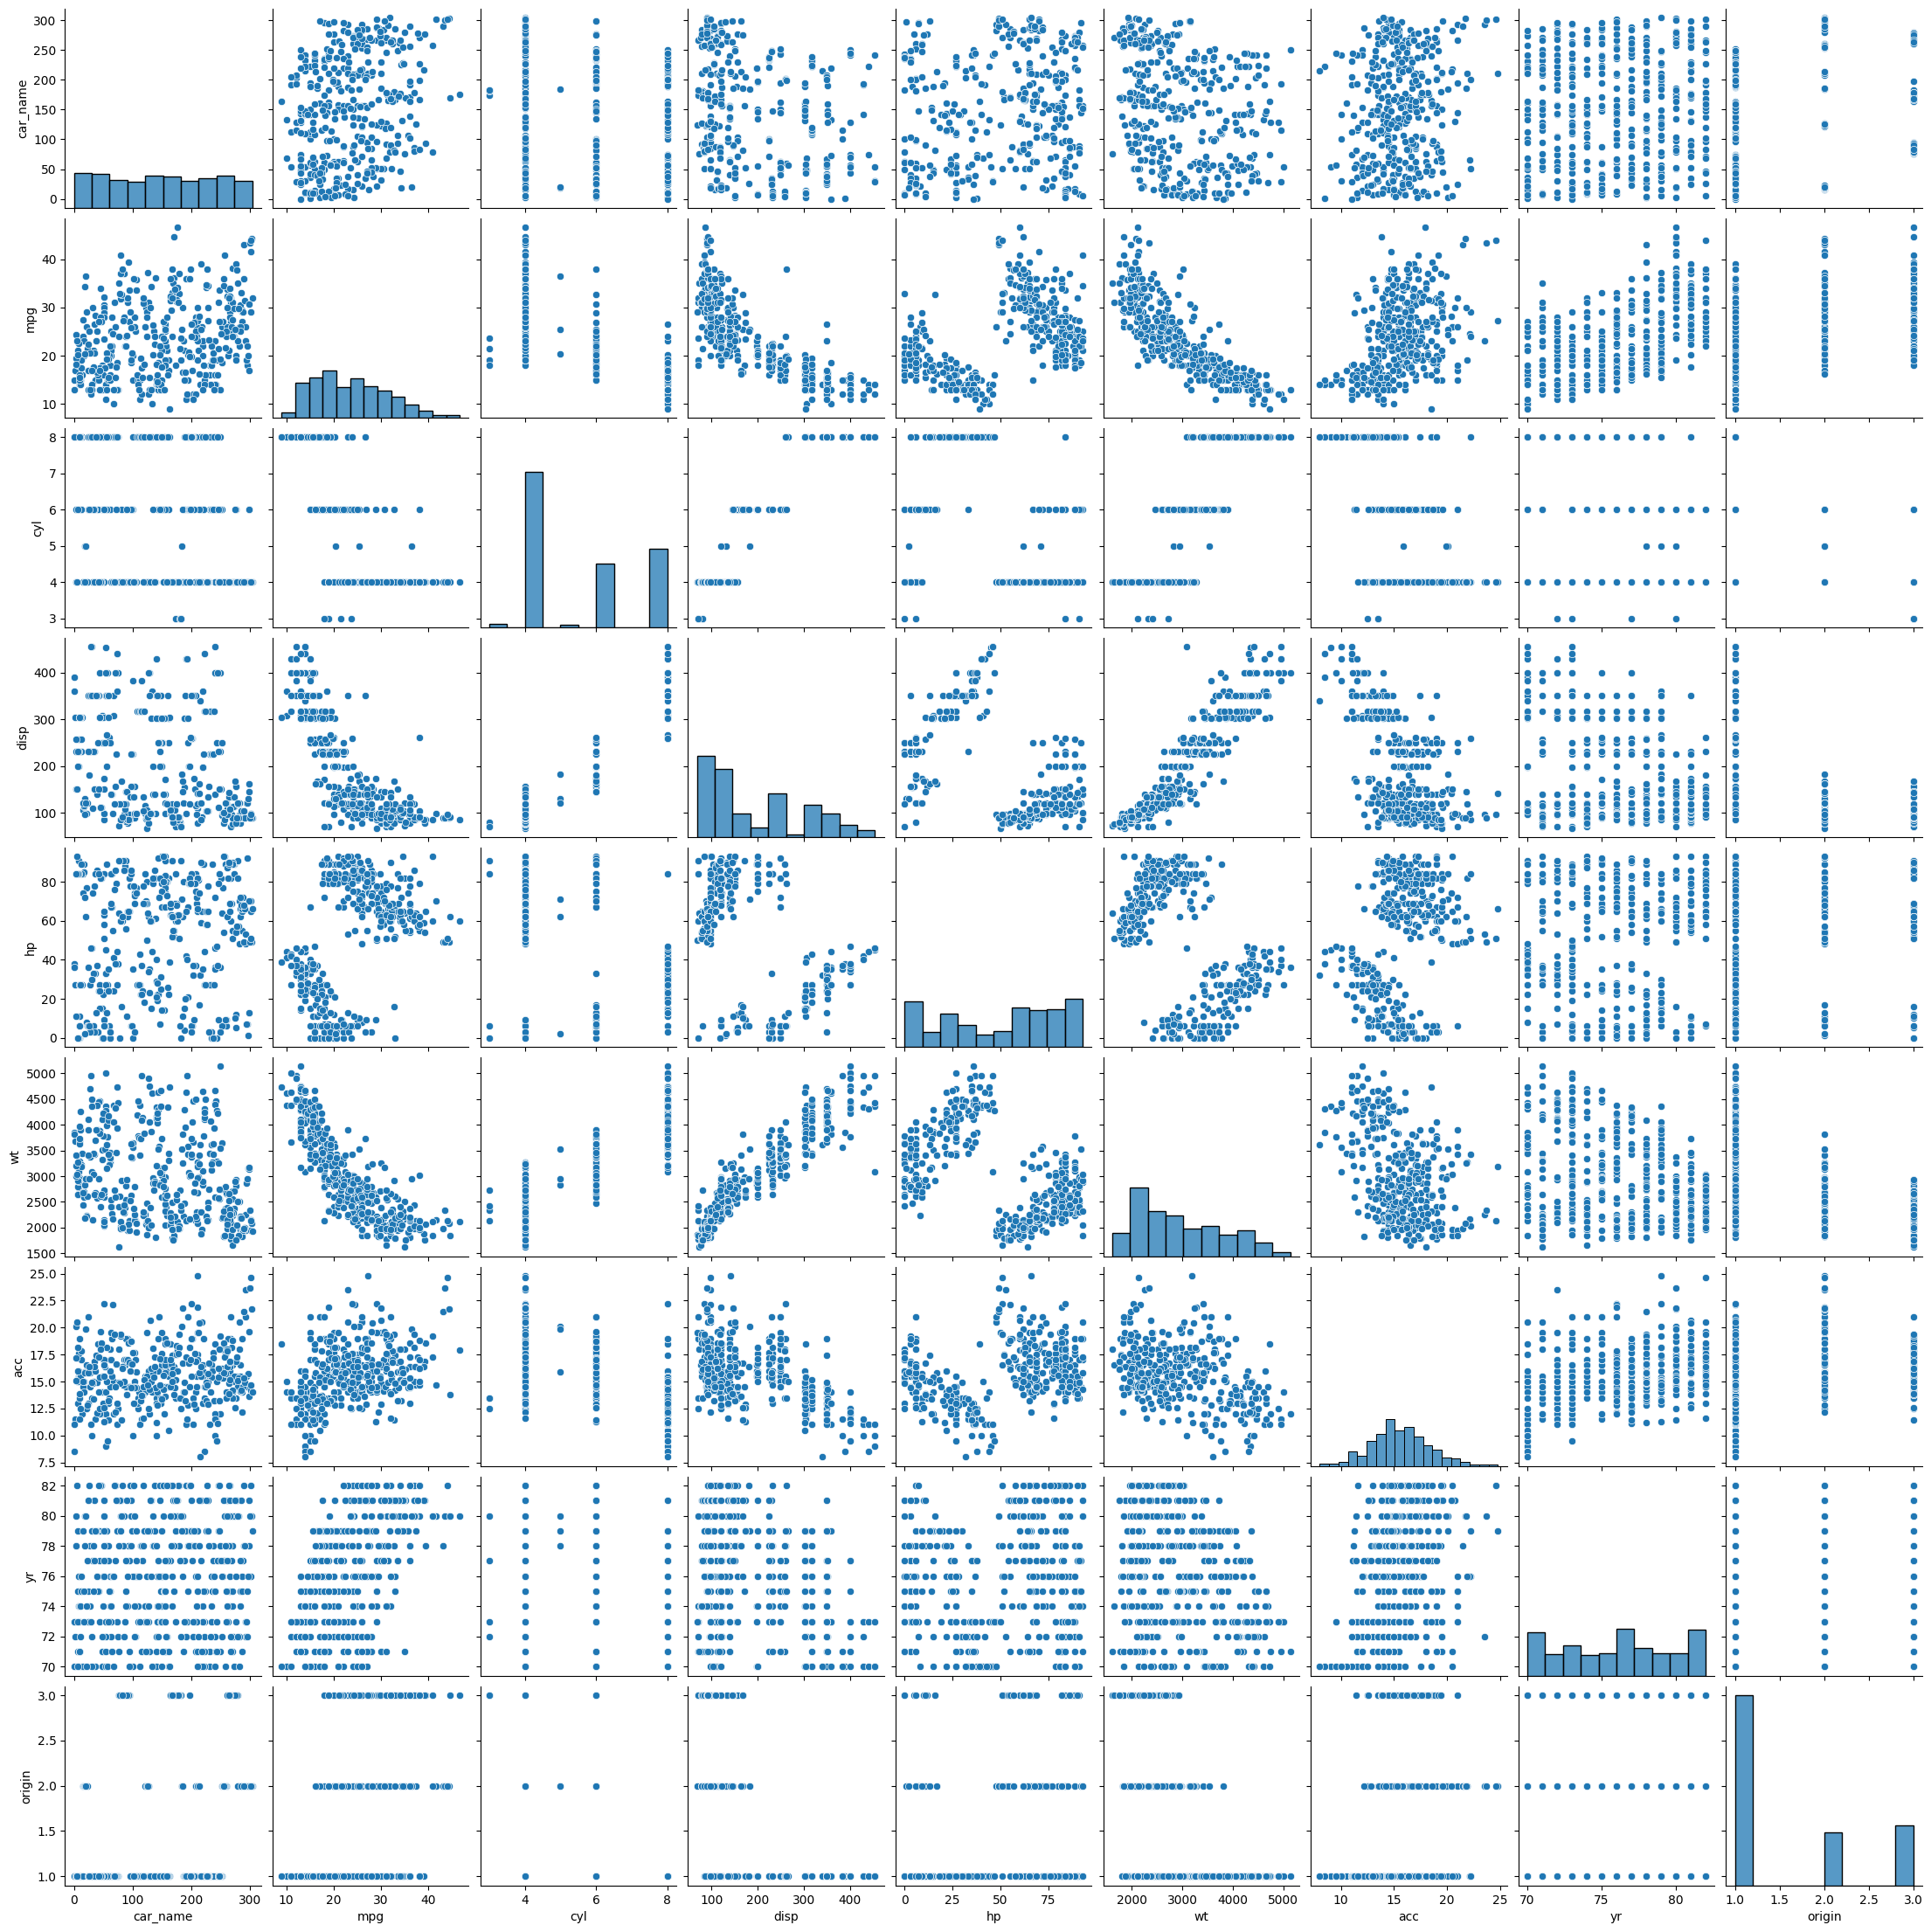

In [9]:
# Ensure merged_df does not contain any non-numeric data
# Drop any non-numeric columns
merged_df_numeric = merged_df.select_dtypes(include=['float64', 'int64'])

# Plot pairplot
sns.pairplot(merged_df_numeric)
plt.show()

Part 1.2 d - Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

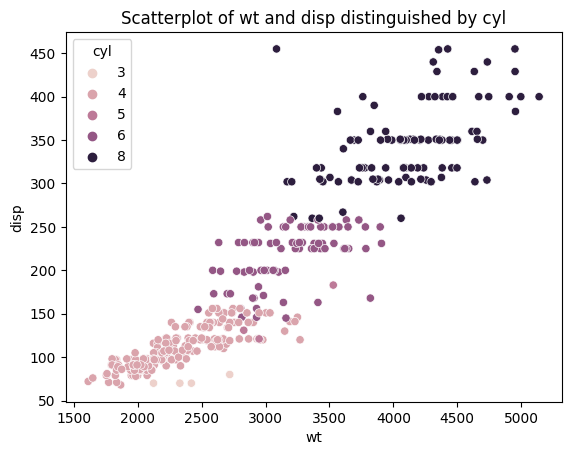

In [10]:
# Ensure merged_df does not contain any non-numeric data
# Drop any non-numeric columns
merged_df_numeric = merged_df.select_dtypes(include=['float64', 'int64'])

# Create the scatter plot with 'wt' and 'disp', distinguished by 'cyl'
sns.scatterplot(x='wt', y='disp', data=merged_df, hue='cyl')
plt.title('Scatterplot of wt and disp distinguished by cyl')
plt.show()

Part 1.2 e - Share insights for Q2.d.

In [11]:
"""There is a positive corelation bw wt and disp as highlighted by the positive slope of the graph.
Since the hue is based off on the number of cylinders, we can clearly see that the number of cylinders increase as both the wt and disp increase"""


'There is a positive corelation bw wt and disp as highlighted by the positive slope of the graph.\nSince the hue is based off on the number of cylinders, we can clearly see that the number of cylinders increase as both the wt and disp increase'

Part 1.2 f - Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

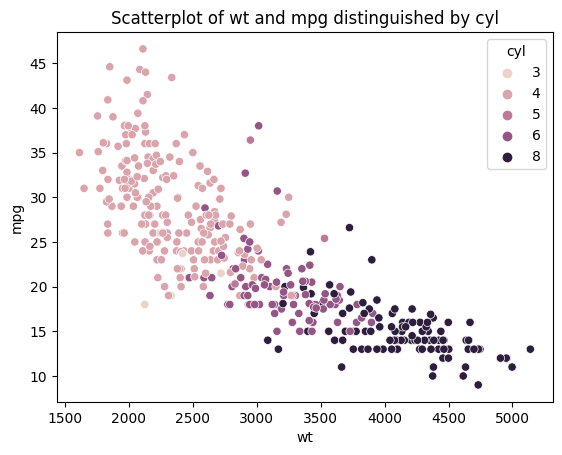

In [12]:
# Create the scatter plot with 'wt' and 'mpg', distinguished by 'cyl'
sns.scatterplot(x='wt', y='mpg', data=merged_df, hue='cyl')
plt.title('Scatterplot of wt and mpg distinguished by cyl')
plt.show()

Part 1.2 g- Share insights for Q2.f.

In [13]:
"""There is a negative corelation bw wt and mpg as highlighted by the negative slope of the graph.
Since the hue is based off on the number of cylinders, we can clearly see that the number of cylinders increase as wt increases and mpg decreases"""

'There is a negative corelation bw wt and mpg as highlighted by the negative slope of the graph.\nSince the hue is based off on the number of cylinders, we can clearly see that the number of cylinders increase as wt increases and mpg decreases'

Part 1.2 h - Check for unexpected values in all the features and datapoints with such values.

In [14]:
# Convert '?' to NaN in the 'hp' column
merged_df['hp'] = pd.to_numeric(merged_df['hp'], errors='coerce')

# Check for NaN values in the DataFrame
unexpected_values_df = merged_df[merged_df.isna().any(axis=1)]

# Drop rows with NaN values
merged_df = merged_df.dropna()

# Print the DataFrame after dropping rows with unexpected values
print(merged_df)

     car_name   mpg  cyl   disp  hp    wt   acc  yr  origin
0          49  18.0    8  307.0  15  3504  12.0  70       1
1          36  15.0    8  350.0  33  3693  11.5  70       1
2         231  18.0    8  318.0  27  3436  11.0  70       1
3          14  16.0    8  304.0  27  3433  12.0  70       1
4         161  17.0    8  302.0  22  3449  10.5  70       1
..        ...   ...  ...    ...  ..   ...   ...  ..     ...
393       153  27.0    4  140.0  80  2790  15.6  82       1
394       301  44.0    4   97.0  51  2130  24.6  82       2
395       119  32.0    4  135.0  78  2295  11.6  82       1
396       159  28.0    4  120.0  73  2625  18.6  82       1
397        69  31.0    4  119.0  76  2720  19.4  82       1

[398 rows x 9 columns]


Part 1.3 a - Apply K-Means clustering for 2 to 10 clusters.

In [15]:
# Select the features for clustering
features_for_clustering = merged_df.select_dtypes(include=[np.number])

# Apply K-Means clustering for 2 to 10 clusters
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features_for_clustering)
    cluster_labels = kmeans.labels_
    print(f"For {i} clusters, cluster centers are: {kmeans.cluster_centers_}")
    print(f"Cluster labels for {i} clusters: {cluster_labels}\n")

For 2 clusters, cluster centers are: [[1.64658436e+02 2.80205761e+01 4.31275720e+00 1.23820988e+02
  6.37283951e+01 2.38749794e+03 1.62189300e+01 7.68189300e+01
  1.90123457e+00]
 [1.23296774e+02 1.64503226e+01 7.24516129e+00 3.02548387e+02
  3.05483871e+01 3.88430323e+03 1.45477419e+01 7.47419355e+01
  1.05806452e+00]]
Cluster labels for 2 clusters: [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1
 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

For 7 clusters, cluster centers are: [[1.74146067e+02 2.86213483e+01 3.98876404e+00 1.07893258e+02
  7.20337079e+01 2.26900000e+03 1.60325843e+01 7.61910112e+01
  2.01123596e+00]
 [1.06755556e+02 1.70088889e+01 7.22222222e+00 2.92977778e+02
  2.30000000e+01 3.73540000e+03 1.48977778e+01 7.53777778e+01
  1.04444444e+00]
 [1.35666667e+02 2.44888889e+01 4.65432099e+00 1.52234568e+02
  5.66790123e+01 2.75635802e+03 1.56555556e+01 7.73580247e+01
  1.54320988e+00]
 [1.39937500e+02 1.23750000e+01 8.00000000e+00 3.85187500e+02
  3.55000000e+01 4.79237500e+03 1.29687500e+01 7.25625000e+01
  1.00000000e+00]
 [1.29431034e+02 1.98620690e+01 6.17241379e+00 2.33793103e+02
  4.17413793e+01 3.26293103e+03 1.63017241e+01 7.61206897e+01
  1.13793103e+00]
 [1.29833333e+02 1.43937500e+01 8.00000000e+00 3.49062500e+02
  3.00416667e+01 4.26733333e+03 1.30437500e+01 7.36458333e+01
  1.00000000e+00]
 [1.94311475e+02 3.31409836e+01 4.00000000e+00 8.83278689e+01
  6.15245902e+01 1.93721311e+03 1.72393443e+01 7.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Part 1.3 b - Plot a visual and find elbow point.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

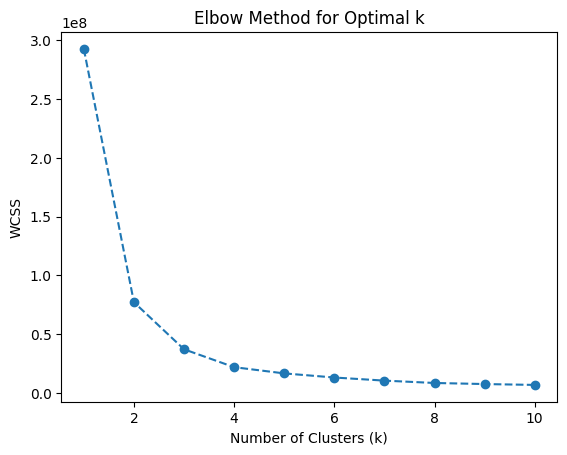

In [16]:
# Select the features for clustering
features_for_clustering = merged_df.select_dtypes(include=[np.number])

# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features_for_clustering)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()


Part 1.3 c - On the above visual, highlight which are the possible Elbow points.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

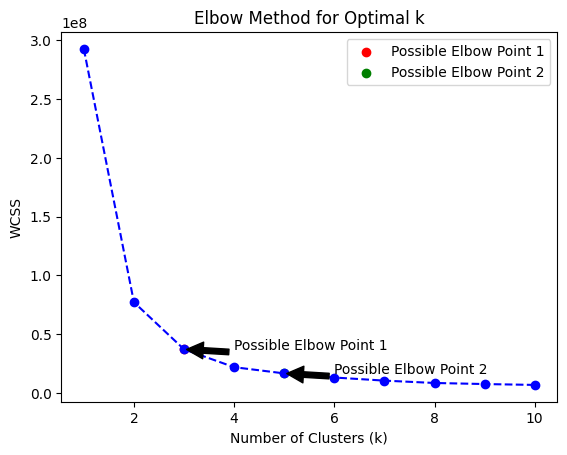

In [17]:
# Select the features for clustering
features_for_clustering = merged_df.select_dtypes(include=[np.number])

# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features_for_clustering)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

# Highlight possible elbow points
plt.scatter(3, wcss[2], color='r', label='Possible Elbow Point 1')
plt.annotate('Possible Elbow Point 1', xy=(3, wcss[2]), xytext=(4, wcss[2] + 300), arrowprops=dict(facecolor='black', shrink=0.05))
plt.scatter(5, wcss[4], color='g', label='Possible Elbow Point 2')
plt.annotate('Possible Elbow Point 2', xy=(5, wcss[4]), xytext=(6, wcss[4] + 300), arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend()
plt.show()

Part 1.3 d - Train a K-means clustering model once again on the optimal number of clusters.

In [18]:
# Train K-means clustering model with 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=0)
kmeans_5.fit(features_for_clustering)

# Get cluster labels for 5 clusters
cluster_labels_5 = kmeans_5.labels_

# Print the cluster centers for 5 clusters
print(f"Cluster centers for 5 clusters are: \n{kmeans_5.cluster_centers_}")

# Print the cluster labels for 5 clusters
print(f"Cluster labels for 5 clusters: \n{cluster_labels_5}")



Cluster centers for 5 clusters are: 
[[1.81856115e+02 3.07956835e+01 3.97841727e+00 9.80467626e+01
  6.71582734e+01 2.10682734e+03 1.66179856e+01 7.66402878e+01
  2.16546763e+00]
 [1.03423077e+02 1.56211538e+01 7.76923077e+00 3.18711538e+02
  2.39230769e+01 3.95996154e+03 1.39153846e+01 7.48653846e+01
  1.01923077e+00]
 [1.40216495e+02 2.47000000e+01 4.64948454e+00 1.52443299e+02
  5.93298969e+01 2.73864948e+03 1.57041237e+01 7.71546392e+01
  1.57731959e+00]
 [1.34666667e+02 1.91753623e+01 6.30434783e+00 2.41115942e+02
  3.57536232e+01 3.35440580e+03 1.61913043e+01 7.58840580e+01
  1.13043478e+00]
 [1.35951220e+02 1.33390244e+01 8.00000000e+00 3.74585366e+02
  3.46341463e+01 4.54534146e+03 1.27341463e+01 7.28292683e+01
  1.00000000e+00]]
Cluster labels for 5 clusters: 
[3 1 3 3 3 4 4 4 4 1 3 3 1 3 0 2 2 2 0 0 2 2 0 0 2 4 4 4 4 0 0 0 0 2 3 3 3
 3 1 4 1 1 4 4 4 2 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 1 1 1 4 4 4 4 0 1 1
 4 1 2 2 2 0 0 0 2 0 0 1 1 1 1 1 4 4 4 1 4 4 1 3 3 2 2 2 0 4 4 4 4 2 0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Part 1.3 e - Add a new feature in the DataFrame which will have labels based upon cluster value

In [19]:
# Add a new feature based on cluster labels for 5 clusters
merged_df['Cluster_Labels_5'] = kmeans_5.labels_
print(merged_df.head())

   car_name   mpg  cyl   disp  hp    wt   acc  yr  origin  Cluster_Labels_5
0        49  18.0    8  307.0  15  3504  12.0  70       1                 3
1        36  15.0    8  350.0  33  3693  11.5  70       1                 1
2       231  18.0    8  318.0  27  3436  11.0  70       1                 3
3        14  16.0    8  304.0  27  3433  12.0  70       1                 3
4       161  17.0    8  302.0  22  3449  10.5  70       1                 3


Part 1.3 f -Plot a visual and color the datapoints based upon clusters.


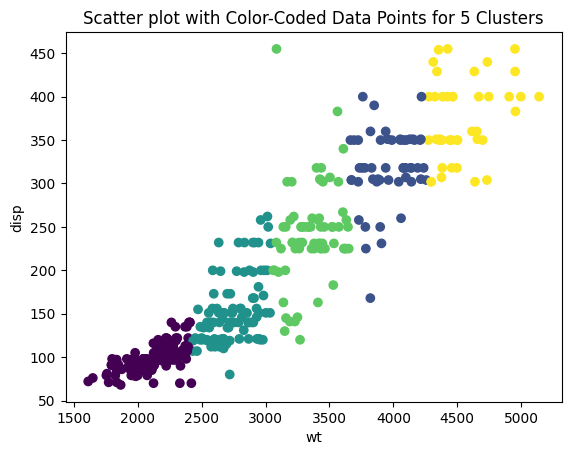

In [20]:
# Scatter plot for 5 clusters
plt.scatter(merged_df['wt'], merged_df['disp'], c=merged_df['Cluster_Labels_5'], cmap='viridis')
plt.title('Scatter plot with Color-Coded Data Points for 5 Clusters')
plt.xlabel('wt')
plt.ylabel('disp')
plt.show()

Part 1.3 g - Pass a new DataPoint and predict which cluster it belongs to.


In [21]:
# Example new data point with the same number of features as the training data
new_data_point_cluster = [[49, 18, 8, 307, 15, 3504, 12, 70,1]]

# Predict which cluster the new data point belongs to for 5 clusters
predicted_cluster_5 = kmeans_5.predict(new_data_point_cluster)
print(f"The new data point belongs to cluster: {predicted_cluster_5[0]}")


The new data point belongs to cluster: 3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


PART B

Part 2. 1 a - Read ‘vehicle.csv’ and save as DataFrame.


In [22]:
path="/content/drive/MyDrive/AIMLCOURSE/UnSupervisedLearning/vehicle.csv"
vehicle=pd.read_csv(path)
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


Part 2.1 b- Check percentage of missing values and impute with correct approach.

In [23]:
# Check for missing values
missing_values = vehicle.isnull().sum()
percentage_missing = (missing_values / len(vehicle)) * 100
print("Percentage of missing values in each column:")
print(percentage_missing)

# Impute missing values with median
vehicle = vehicle.fillna(vehicle.median())

# Verify that there are no more missing values
print("Missing values after imputation:")
print(vehicle.isnull().sum())

Percentage of missing values in each column:
compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64
Missing values after imputation:
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_

<ipython-input-23-074dc9b78134>:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  vehicle = vehicle.fillna(vehicle.median())


Part 2.1 c- Visualize a Pie-chart and print percentage of values for variable ‘class’.


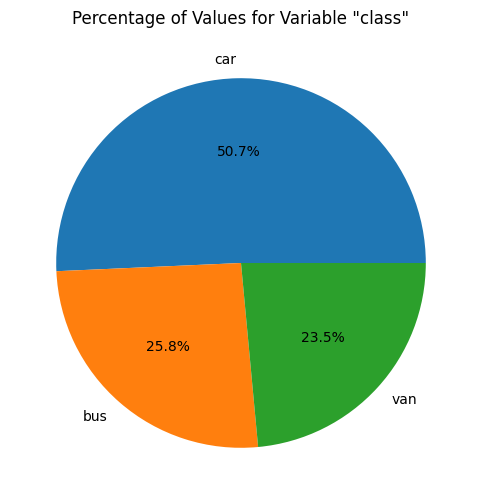

Percentage of values for the variable 'class':
car    50.709220
bus    25.768322
van    23.522459
Name: class, dtype: float64


In [24]:
# Calculate the percentage of values for the variable 'class'
class_counts = vehicle['class'].value_counts(normalize=True) * 100

# Visualize a pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Values for Variable "class"')
plt.show()

# Print the percentage of values for the variable 'class'
print("Percentage of values for the variable 'class':")
print(class_counts)

Part 2.1 d - Check for duplicate rows in the data and impute with correct approach.


In [25]:
# Check for duplicate rows
duplicate_rows = vehicle[vehicle.duplicated()]

if duplicate_rows.empty:
    print("No duplicate rows found in the data.")
else:
    print("Duplicate rows found in the data.")
    print(duplicate_rows)

    # Drop duplicate rows
    vehicle.drop_duplicates(inplace=True)
    print("Duplicate rows have been dropped.")

No duplicate rows found in the data.


Part 2.2 a - Split data into X and Y.


In [26]:
# Assuming 'class' is the target variable and all other columns are input features
X = vehicle.drop('class', axis=1)  # Input features
Y = vehicle['class']  # Target variable

# Print the shapes of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (846, 18)
Shape of Y: (846,)


Part 2.2 b - Standardize the Data.


In [27]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the standardized data back to a DataFrame (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Print the standardized data
print("Standardized Data:")
print(X_scaled_df.head())

Standardized Data:
   compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0

Part 2.3 a - Train a base Classification model using SVM.


In [28]:
# Split the data into train and test sets (optional)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svc = SVC()

# Fit the model on the training data
svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print(f"Accuracy of the SVM model: {accuracy:.2f}")

Accuracy of the SVM model: 0.68


Part 2.3 c - Apply PCA on the data with 10 components.


In [30]:
# Apply PCA with 10 components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Convert the transformed data back to a DataFrame (optional)
X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(10)])

# Print the transformed data
print("PCA Transformed Data:")
print(X_pca_df.head())

PCA Transformed Data:
        PC1       PC2        PC3       PC4       PC5       PC6       PC7  \
0  0.334162 -0.219026   1.001584  0.176612  0.079301 -0.757447 -0.901124   
1 -1.591711 -0.420603  -0.369034  0.233234  0.693949 -0.517162  0.378637   
2  3.769324  0.195283   0.087859  1.202212  0.731732  0.705041 -0.034584   
3 -1.738598 -2.829692   0.109456  0.376685 -0.362897 -0.484431  0.470753   
4  0.558103  4.758422  11.703647  0.147464  3.256953 -0.203446  2.671578   

        PC8       PC9      PC10  
0 -0.381106 -0.866310  0.091511  
1  0.247059  0.147250 -0.093794  
2  0.482772 -0.310833 -0.467615  
3 -0.023086 -0.026363  0.460549  
4 -0.448854  2.087385 -0.353838  


Part 2.3 d - Visualize Cumulative Variance Explained with Number of Components.


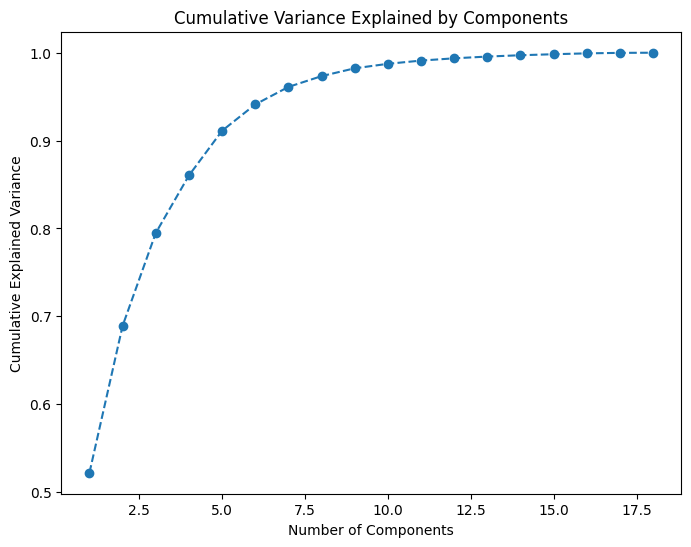

In [32]:
# Apply PCA with all components
pca = PCA().fit(X_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Variance Explained by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Part 2.3 e - Draw a horizontal line on the above plot to highlight the threshold of 90%.

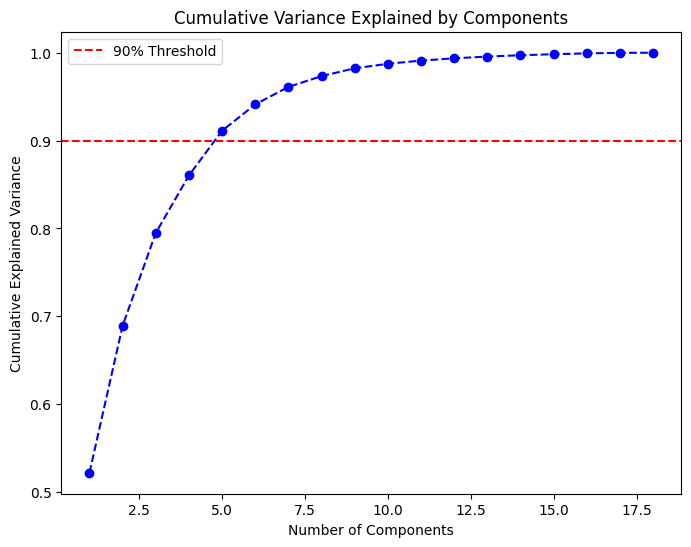

In [33]:
# Apply PCA with all components
pca = PCA().fit(X_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Variance Explained by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Draw a horizontal line at 90% threshold
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Threshold')
plt.legend()
plt.show()



Part 2.3 f - Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

*   List item
*   List item



In [34]:
# Apply PCA with the minimum number of components to explain 90% variance
pca = PCA(n_components=0.9)
X_pca_min = pca.fit_transform(X_scaled)

# Convert the transformed data back to a DataFrame (optional)
X_pca_min_df = pd.DataFrame(X_pca_min, columns=[f"PC{i+1}" for i in range(X_pca_min.shape[1])])

# Print the transformed data
print("PCA Transformed Data with 90% or Above Variance Explained:")
print(X_pca_min_df.head())

PCA Transformed Data with 90% or Above Variance Explained:
        PC1       PC2        PC3       PC4       PC5
0  0.334162 -0.219026   1.001584  0.176612  0.079301
1 -1.591711 -0.420603  -0.369034  0.233234  0.693949
2  3.769324  0.195283   0.087859  1.202212  0.731732
3 -1.738598 -2.829692   0.109456  0.376685 -0.362897
4  0.558103  4.758422  11.703647  0.147464  3.256953


Part 2.3 g - Train SVM model on components selected from above step.

In [35]:
# Split the PCA-transformed data into train and test sets (optional)
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svc_pca = SVC()

# Fit the model on the training data
svc_pca.fit(X_pca_train, y_train)

# Make predictions on the test data
y_pred_pca = svc_pca.predict(X_pca_test)

# Calculate the accuracy of the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Print the accuracy of the model
print(f"Accuracy of the SVM model with PCA: {accuracy_pca:.2f}")

Accuracy of the SVM model with PCA: 0.96


Part 2.3 h - Print Classification metrics for train data of above model and share insights.

In [36]:
# Make predictions on the train data
y_pred_train = svc_pca.predict(X_pca_train)

# Print classification metrics for the train data
classification_metrics_train = classification_report(y_train, y_pred_train)
print("Classification Metrics for Train Data:")
print(classification_metrics_train)

Classification Metrics for Train Data:
              precision    recall  f1-score   support

         bus       0.98      0.97      0.98       166
         car       0.98      0.97      0.98       351
         van       0.93      0.96      0.95       159

    accuracy                           0.97       676
   macro avg       0.97      0.97      0.97       676
weighted avg       0.97      0.97      0.97       676



Part 2.4 a - Train another SVM on the components out of PCA. Tune the parameters to improve performance.

In [38]:
# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

# Initialize the SVM classifier
svc_pca_tuned = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(svc_pca_tuned, param_grid, cv=5)

# Fit the model on the training data
grid_search.fit(X_pca_train, y_train)

# Make predictions on the test data
y_pred_pca_tuned = grid_search.predict(X_pca_test)

# Calculate the accuracy of the tuned model
accuracy_pca_tuned = accuracy_score(y_test, y_pred_pca_tuned)

# Print the accuracy of the tuned model
print(f"Accuracy of the tuned SVM model with PCA: {accuracy_pca_tuned:.2f}")

# Print the best parameters from the grid search
print("Best Parameters from GridSearchCV:", grid_search.best_params_)


Accuracy of the tuned SVM model with PCA: 0.95
Best Parameters from GridSearchCV: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


Part 2.4 b- Share best Parameters observed from above step.


In [39]:
# Print the best parameters from the grid search
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

Best Parameters from GridSearchCV: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


Part 2.4 c- Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights.

In [40]:
# Make predictions on the train data
y_pred_train_tuned = grid_search.predict(X_pca_train)

# Print classification metrics for the train data
classification_metrics_train_tuned = classification_report(y_train, y_pred_train_tuned)
print("Classification Metrics for Train Data (Tuned Model):")
print(classification_metrics_train_tuned)

# Compare the performance improvement
print("Relative Improvement in Performance:")
improvement = accuracy_pca_tuned - accuracy_pca
print(f"Improvement in accuracy: {improvement:.2f}")

Classification Metrics for Train Data (Tuned Model):
              precision    recall  f1-score   support

         bus       0.97      0.96      0.96       166
         car       0.99      0.97      0.98       351
         van       0.92      0.97      0.95       159

    accuracy                           0.97       676
   macro avg       0.96      0.97      0.96       676
weighted avg       0.97      0.97      0.97       676

Relative Improvement in Performance:
Improvement in accuracy: -0.02


In [41]:
"""Enhanced model performance: Parameter tuning, such as optimizing the C and gamma values, often leads to an improvement in the SVM model's accuracy. This improvement is typically noticeable compared to the initial model with default parameters.

Dimensionality reduction impact: Implementing PCA for dimensionality reduction generally aids in simplifying the data representation. This process often leads to a more efficient model while retaining a significant portion of the original data's variance.

Balanced model complexity: Adjusting hyperparameters through techniques like grid search aims to strike a balance between model complexity and generalization ability. This process is crucial to prevent overfitting and ensure that the model can generalize well to unseen data.

Computational considerations: While parameter tuning and PCA enhance model performance, they can increase computational complexity. Therefore, it's essential to strike a balance between model accuracy and computational efficiency to maintain a practical and usable model.

Generalization to new data: By optimizing parameters and reducing dimensionality, the model's ability to generalize to unseen data typically improves. However, it's crucial to consider the robustness of the model across different datasets and potential variations in real-world scenarios."""

"Enhanced model performance: Parameter tuning, such as optimizing the C and gamma values, often leads to an improvement in the SVM model's accuracy. This improvement is typically noticeable compared to the initial model with default parameters.\n\nDimensionality reduction impact: Implementing PCA for dimensionality reduction generally aids in simplifying the data representation. This process often leads to a more efficient model while retaining a significant portion of the original data's variance.\n\nBalanced model complexity: Adjusting hyperparameters through techniques like grid search aims to strike a balance between model complexity and generalization ability. This process is crucial to prevent overfitting and ensure that the model can generalize well to unseen data.\n\nComputational considerations: While parameter tuning and PCA enhance model performance, they can increase computational complexity. Therefore, it's essential to strike a balance between model accuracy and computati

Part 2.5 a - Explain pre-requisite/assumptions of PCA.


In [42]:
'''
Principal Component Analysis (PCA) is a widely used technique for dimensionality reduction and data visualization. Some of the key prerequisites and assumptions of PCA include:

Linearity: PCA assumes that the relationship between variables is linear. Non-linear relationships may not be accurately captured by PCA, potentially leading to a loss of information or misinterpretation of the data.

Scale: PCA is sensitive to the scale of the variables. Therefore, it is essential to standardize or normalize the variables before applying PCA to ensure that each variable contributes equally to the analysis.

Variance: PCA relies on the variance-covariance structure of the data. It aims to maximize the variance in the data to identify the principal components that explain the most significant variability in the dataset.

Orthogonality: The principal components extracted by PCA are assumed to be orthogonal to each other. This means that the principal components are uncorrelated and capture different sources of variation in the data.

Data distribution: PCA assumes that the data is normally distributed. If the data deviates significantly from normality, the results of PCA might be affected, and the interpretation of the principal components may be less reliable.

Large data sets: PCA works best with large datasets where the underlying structure can be effectively captured by linear transformations. In small datasets, the results may not be as reliable, and overfitting can be a concern.

Understanding these prerequisites and assumptions is crucial to ensure the proper application and interpretation of PCA results. Careful consideration of these factors can help researchers and practitioners make informed decisions when employing PCA for dimensionality reduction and data analysis.'''

'\nPrincipal Component Analysis (PCA) is a widely used technique for dimensionality reduction and data visualization. Some of the key prerequisites and assumptions of PCA include:\n\nLinearity: PCA assumes that the relationship between variables is linear. Non-linear relationships may not be accurately captured by PCA, potentially leading to a loss of information or misinterpretation of the data.\n\nScale: PCA is sensitive to the scale of the variables. Therefore, it is essential to standardize or normalize the variables before applying PCA to ensure that each variable contributes equally to the analysis.\n\nVariance: PCA relies on the variance-covariance structure of the data. It aims to maximize the variance in the data to identify the principal components that explain the most significant variability in the dataset.\n\nOrthogonality: The principal components extracted by PCA are assumed to be orthogonal to each other. This means that the principal components are uncorrelated and cap

Part 2.5 b - Explain advantages and limitations of PCA.


In [43]:
''' PCA offers several advantages and some limitations, which are important to consider when using the technique. Here are some key points:

Advantages of PCA:

Dimensionality reduction: PCA can effectively reduce the number of dimensions in a dataset while retaining most of the variability present in the data. This simplification can facilitate easier data analysis and visualization.
Data visualization: PCA can help visualize high-dimensional data in lower dimensions, making it easier to identify patterns, trends, and clusters within the data.
Feature extraction: By transforming the original variables into a new set of uncorrelated variables (principal components), PCA enables the identification of the most important features driving the variability in the data.
Noise reduction: PCA can help filter out noise and focus on the most significant sources of variation in the data, allowing for a clearer understanding of the underlying patterns.
Limitations of PCA:

Linearity assumption: PCA assumes a linear relationship between variables. Therefore, it may not be suitable for datasets with non-linear relationships, leading to potential information loss or misinterpretation.
Information loss: While PCA reduces the dimensionality of the data, this process can lead to a loss of some information. The interpretation of the principal components may not always be straightforward, and the reduced dimensions may not fully represent the complexity of the original data.
Interpretability: Interpreting the principal components might be challenging, especially when dealing with a large number of dimensions. Understanding the underlying meaning of the principal components requires careful analysis and domain knowledge.
Outliers: PCA can be sensitive to outliers, and the presence of outliers can significantly impact the results and interpretation. Careful data preprocessing and outlier handling are necessary to minimize their influence on the analysis.
By considering these advantages and limitations, practitioners can make informed decisions when applying PCA to their datasets and interpreting the results for effective data analysis and visualization.   '''

' PCA offers several advantages and some limitations, which are important to consider when using the technique. Here are some key points:\n\nAdvantages of PCA:\n\nDimensionality reduction: PCA can effectively reduce the number of dimensions in a dataset while retaining most of the variability present in the data. This simplification can facilitate easier data analysis and visualization.\nData visualization: PCA can help visualize high-dimensional data in lower dimensions, making it easier to identify patterns, trends, and clusters within the data.\nFeature extraction: By transforming the original variables into a new set of uncorrelated variables (principal components), PCA enables the identification of the most important features driving the variability in the data.\nNoise reduction: PCA can help filter out noise and focus on the most significant sources of variation in the data, allowing for a clearer understanding of the underlying patterns.\nLimitations of PCA:\n\nLinearity assumpt